In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Libraries


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

# Importing Data

In [3]:
data = pd.read_csv('spam.csv',encoding='latin-1')

# Exploring & Cleaning Data

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
cols_to_drop = {'Unnamed: 2','Unnamed: 3','Unnamed: 4'}
data.drop(columns = cols_to_drop,axis=1,inplace=True)

In [6]:
#renaming the column names to be descriptive
names = {"v1":"spam","v2":"email"}
data.rename(columns = names,inplace=True)

In [7]:
data.head()

,spam,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   spam    5572 non-null   object
 1   email   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
data.describe()

,spam,email
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
#checking null values
data.isnull().sum()

spam     0
email    0
dtype: int64

In [11]:
#checking for NaN,none values
data.isna().sum()

spam     0
email    0
dtype: int64

In [12]:
#checking for duplicates
data.duplicated().sum()

403

In [13]:
#we got 403 duplicated emails so we will drop them out if the data set
data.drop_duplicates(inplace=True)

In [14]:
#now we have 5169 instead of 5572 rows in the dataset
data.describe()

,spam,email
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


# Data visualization

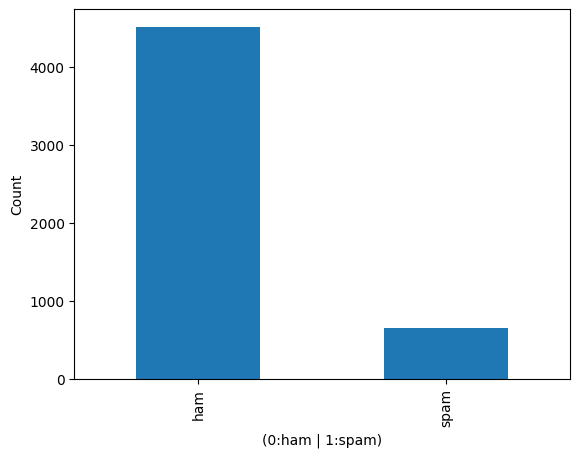

In [15]:
data['spam'].value_counts().plot(kind='bar')
plt.xlabel('(0:ham | 1:spam)')
plt.ylabel('Count')
plt.show()

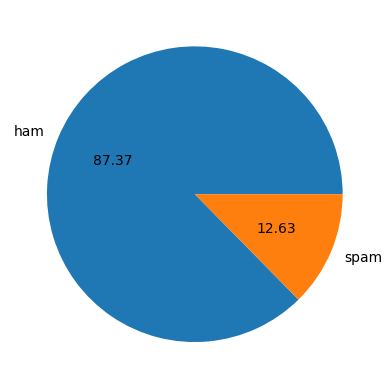

In [16]:
plt.pie(data['spam'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

# Data Preprocessing

In [17]:
data.spam = [0 if value=="ham" else 1 for value in data.spam]

In [18]:
data.head()

,spam,email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Splitting Data

In [19]:
X = data['email']
y = data['spam']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=3)

# TF-IDF vectorizer for feature extraction

In [21]:
#Downloading english stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hazem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
feature_xt = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)
X_train_fs = feature_xt.fit_transform(X_train)
X_test_fs = feature_xt.transform(X_test)

In [23]:
#Converting the sparse matrix to a dense array
X_train_fs = X_train_fs.toarray()
X_test_fs = X_test_fs.toarray()

# Model Building

****1. Naive Bayes****

In [24]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_fs,y_train)
y_pred = gnb.predict(X_test_fs)

In [25]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy*100)

Accuracy:  88.00773694390716


****2. Logistic Regression****

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_fs,y_train)
y_pred = lr.predict(X_test_fs)

In [27]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy*100)

Accuracy:  96.0348162475822


****3. Support vector machine****

In [28]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train_fs,y_train)
y_pred = model.predict(X_test_fs)

In [29]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy*100)

Accuracy:  97.48549323017409
